# APLICAÇÃO DO KNN - CLASSIFICAÇÃO

#### POR - Fabrício Barbosa  
#### Contato - sfs.rj@hotmail.com

#### INFORMAÇÕES GERAIS - Conjunto de dados referentes à pesquisa de características relativas a tumores de mama. 
#### bi-rads(escala específica), idade do pesquisado, forma da massa, margem da massa, densidade e diagnóstico(benigno ou maligno)

### IMPORTAÇÃO DAS BIBLIOTECAS E LEITURA DO ARQUIVO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
masses_test = pd.read_csv('mammographic_masses.txt',sep=',',
                          header=None,names=['bi-rads','age','form','marg','density','situation'] )

### PREPARANDO OS DADOS

In [14]:
masses_test.head()

,bi-rads,age,form,marg,density,situation
0,5,67,3,5,3,1
1,4,43,1,1,?,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,?,1


In [15]:
masses_test.shape # DIMENSÕES

(961, 6)

In [16]:
masses_test.dtypes # OBSERVANDO OS TIPOS ATRIBUÍDOS A CADA COLUNA

bi-rads      object
age          object
form         object
marg         object
density      object
situation     int64
dtype: object

In [20]:
masses_test.replace('?',np.nan,inplace=True) # ANTES DE CONVERTER OS TIPOS, SUBSTITUIR O SINAL '?' POR np.nan(dado ausente)

In [21]:
masses_test['bi-rads'] = pd.to_numeric(masses_test['bi-rads'])
masses_test['age'] = pd.to_numeric(masses_test['age'])
masses_test['form'] = pd.to_numeric(masses_test['form'])
masses_test['density'] = pd.to_numeric(masses_test['density'])
masses_test['marg'] = pd.to_numeric(masses_test['marg'])

In [22]:
masses_test.dtypes # VERIFICANDO A CONVERSÃO

bi-rads      float64
age          float64
form         float64
marg         float64
density      float64
situation      int64
dtype: object

In [23]:
masses_test.info() #AVALIANDO A QUANTIDADE DE DADOS AUSENTES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
bi-rads      959 non-null float64
age          956 non-null float64
form         930 non-null float64
marg         913 non-null float64
density      885 non-null float64
situation    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


In [24]:
masses_test.dropna(inplace=True) # REMOVENDO OS DADOS AUSENTES

In [25]:
masses_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 830 entries, 0 to 960
Data columns (total 6 columns):
bi-rads      830 non-null float64
age          830 non-null float64
form         830 non-null float64
marg         830 non-null float64
density      830 non-null float64
situation    830 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.4 KB


In [26]:
sum(masses_test.duplicated()) # VERIFICANDO OS DADOS DUPLICADOS

266

#### Pela característica dos dataset, não levaremos em conta a informação de duplicação pois há grande chance de se haver realmente pacientes com idades e avaliações idênticas


### EXPLORANDO

In [27]:
import seaborn as sns
%matplotlib inline

In [29]:
masses_test['situation'].value_counts()

0    427
1    403
Name: situation, dtype: int64

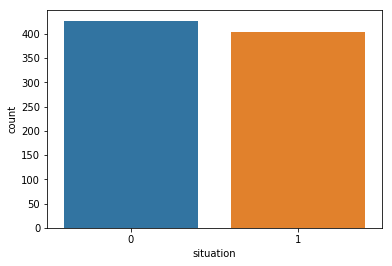

In [28]:
sns.countplot(masses_test['situation'])

#### Diagnósticos/ benignos = 427    Diagnóstico/ malignos = 403

In [30]:
idades = pd.cut(masses_test['age'],[18,40,65,100])
pd.value_counts(idades)

(40, 65]     472
(65, 100]    231
(18, 40]     126
Name: age, dtype: int64

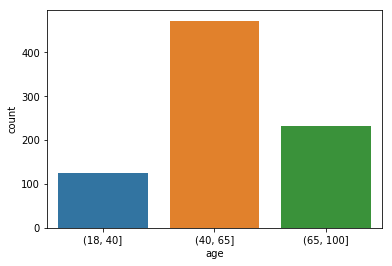

In [31]:
sns.countplot(idades)

#### A maior parte dos investigados na pesquisa possuíam entre 40 e 65 anos

In [33]:
malig = masses_test.age[masses_test['situation'] == 1].mean()
malig

62.65260545905707

#### A média de idade dos investigados que tiveram diagnóstico de tumor maligno é de aproximadamente 63 anos

### APLICANDO O KNN

In [35]:
features = ['bi-rads','age','form','marg','density']
X = masses_test[features]
y = masses_test['situation']
# SEPARAÇÃO DE ENTRADAS E SAÍDA

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_treino,x_teste,y_treino,y_teste = train_test_split (X,y,test_size = 0.3,random_state = 25) #MODELOS DE TREINO E TESTE

In [49]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors = 7)
Knn.fit(X,y)
print(y_teste[0:5])
print(Knn.predict(x_teste)) #TREINAMENTO E CLASSIFICAÇÃO

947    0
698    0
355    0
826    1
108    0
Name: situation, dtype: int64
[0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0
 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0]


### AVALIANDO A QUALIDADE DO MODELO

In [50]:
pd.crosstab(Knn.predict(x_teste),y_teste) # MATRIZ DE CONFUSÃO

situation,0,1
row_0,,
0,117,23
1,13,96


In [51]:
from sklearn import metrics
metrics.accuracy_score(y_teste, Knn.predict(x_teste)) #MEDIÇÃO DA ACURÁCIA

0.8554216867469879

#### FONTE DO DATASET = archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data
